# DA Final project:

# Group 3  

# social anxiety

###  Name of students:
Neta Aharoni  
Daniel Cohen  
Maoz Goldberg  




<a id='top'></a>

<div>
<img src="https://storage.googleapis.com/kaggle-datasets-images/6931996/11117207/9c78b2064b2d4550b0283ae48872bf79/dataset-cover.jpg?t=2025-03-21-13-36-33"/>
</div>


In [7]:
!pip install geopandas
!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image

### Information on the data
The target of our project is to minimize the frequency of social anxiety.
<br>taken from:  https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset



In [14]:
df = pd.read_csv("enhanced_anxiety.csv")
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4


In [16]:
df.shape

(11000, 19)

In [18]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

### 1. Wrangling data

In [21]:
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

## המרת עמודות טקסטואליות לערכים בינאריים



In [24]:
df1 = df.copy()
binary_cols = [
    'Smoking',
    'Family History of Anxiety',
    'Dizziness',
    'Medication',
    'Recent Major Life Event'
]

for col in binary_cols:
    df1[col] = df1[col].map({'Yes': 1, 'No': 0})

df.dtypes

Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm)                       int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Anxiety Level (1-10)                   int64
dtype: object

In [26]:
df1

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,1,0,10,114,14,4,0,1,3,1,7,5
1,46,Other,Nurse,6.2,5.7,200,8,1,1,1,62,23,2,1,0,2,0,8,3
2,64,Male,Other,5.0,3.7,117,4,0,1,1,91,28,3,0,0,1,1,1,1
3,20,Female,Scientist,5.8,2.8,360,6,1,0,4,86,17,3,0,0,0,0,1,2
4,49,Female,Other,8.2,2.3,247,4,1,0,1,98,19,4,1,1,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,1,0,8,91,28,1,1,1,1,0,3,6
10996,50,Other,Teacher,6.6,3.6,64,17,1,0,7,95,17,3,0,0,2,0,7,3
10997,29,Male,Nurse,6.7,6.9,159,14,0,0,8,72,16,1,1,1,2,1,7,4
10998,53,Other,Artist,5.7,2.7,248,8,0,0,4,112,28,3,1,1,1,1,2,4


In [28]:
df.isnull().sum()


Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

# Noisy data
#### Checking that these variables are within a reasonable range with Boxplot

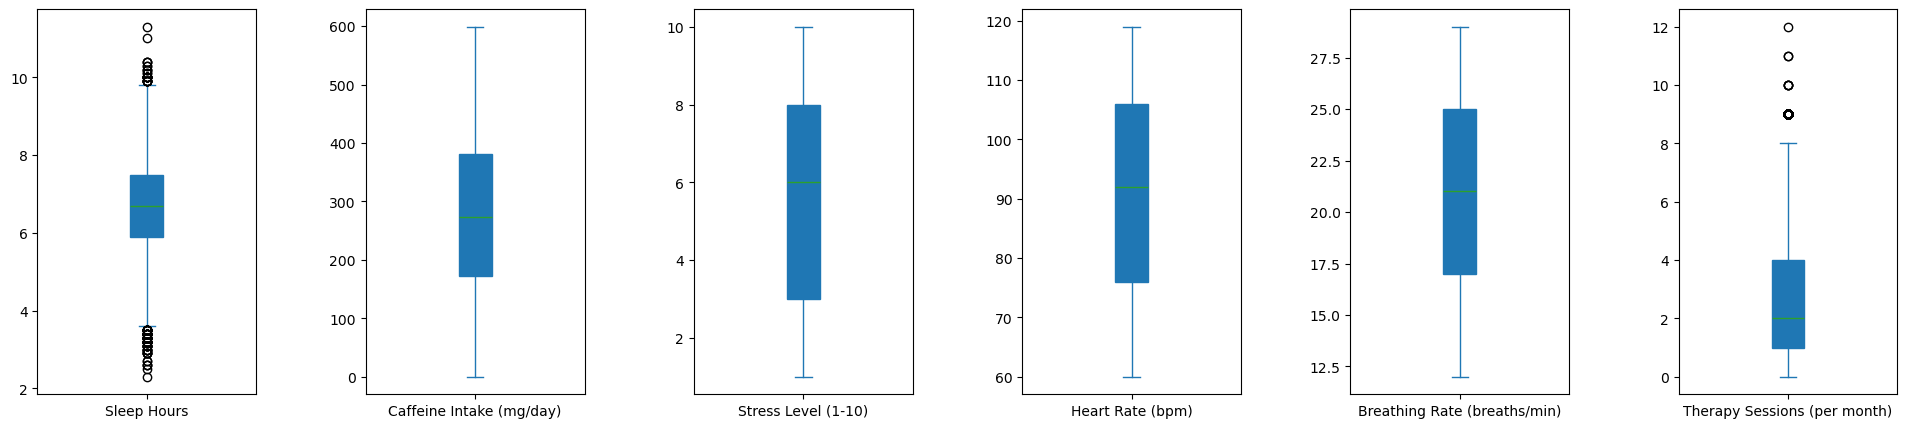

In [31]:
columns_of_interest = [
    'Sleep Hours',
    'Caffeine Intake (mg/day)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Therapy Sessions (per month)']

df[columns_of_interest].plot(
    subplots=True,
    layout=(1, len(columns_of_interest)),  # גרף אחד ליד השני
    kind='box',
    figsize=(24, 5),
    patch_artist=True)

plt.subplots_adjust(wspace=0.5)  # ריווח בין הגרפים
plt.show()


In [123]:
correlation_matrix = df1.corr(numeric_only = True, method = 'spearman' ).round(2)
correlation_matrix

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
Age,1.00,-0.18,0.04,-0.04,-0.02,-0.02,-0.02,-0.04,-0.03,-0.01,-0.02,-0.03,-0.00,-0.07,-0.01,0.05,-0.03
Sleep Hours,-0.18,1.00,0.16,-0.18,-0.06,-0.06,-0.07,-0.15,-0.12,-0.10,-0.10,-0.08,-0.03,-0.20,-0.06,0.13,-0.35
Physical Activity (hrs/week),0.04,0.16,1.00,-0.12,-0.04,-0.04,-0.05,-0.11,-0.08,-0.07,-0.08,-0.04,-0.02,-0.16,-0.03,0.09,-0.18
Caffeine Intake (mg/day),-0.04,-0.18,-0.12,1.00,0.04,0.03,0.07,0.12,0.08,0.08,0.07,0.03,0.02,0.17,0.04,-0.09,0.28
Alcohol Consumption (drinks/week),-0.02,-0.06,-0.04,0.04,1.00,0.00,0.02,0.05,0.04,0.02,0.02,0.03,0.00,0.04,0.01,-0.03,0.07
Smoking,-0.02,-0.06,-0.04,0.03,0.00,1.00,0.00,0.03,0.02,0.04,0.02,0.00,0.02,0.04,0.02,-0.02,0.06
Family History of Anxiety,-0.02,-0.07,-0.05,0.07,0.02,0.00,1.00,0.06,0.04,0.04,0.02,0.01,0.01,0.58,0.01,-0.06,0.17
Stress Level (1-10),-0.04,-0.15,-0.11,0.12,0.05,0.03,0.06,1.00,0.09,0.06,0.09,0.05,0.02,0.16,0.04,-0.11,0.72
Heart Rate (bpm),-0.03,-0.12,-0.08,0.08,0.04,0.02,0.04,0.09,1.00,0.05,0.06,0.04,0.00,0.12,0.03,-0.09,0.13
Breathing Rate (breaths/min),-0.01,-0.10,-0.07,0.08,0.02,0.04,0.04,0.06,0.05,1.00,0.05,0.01,0.02,0.10,0.02,-0.05,0.10


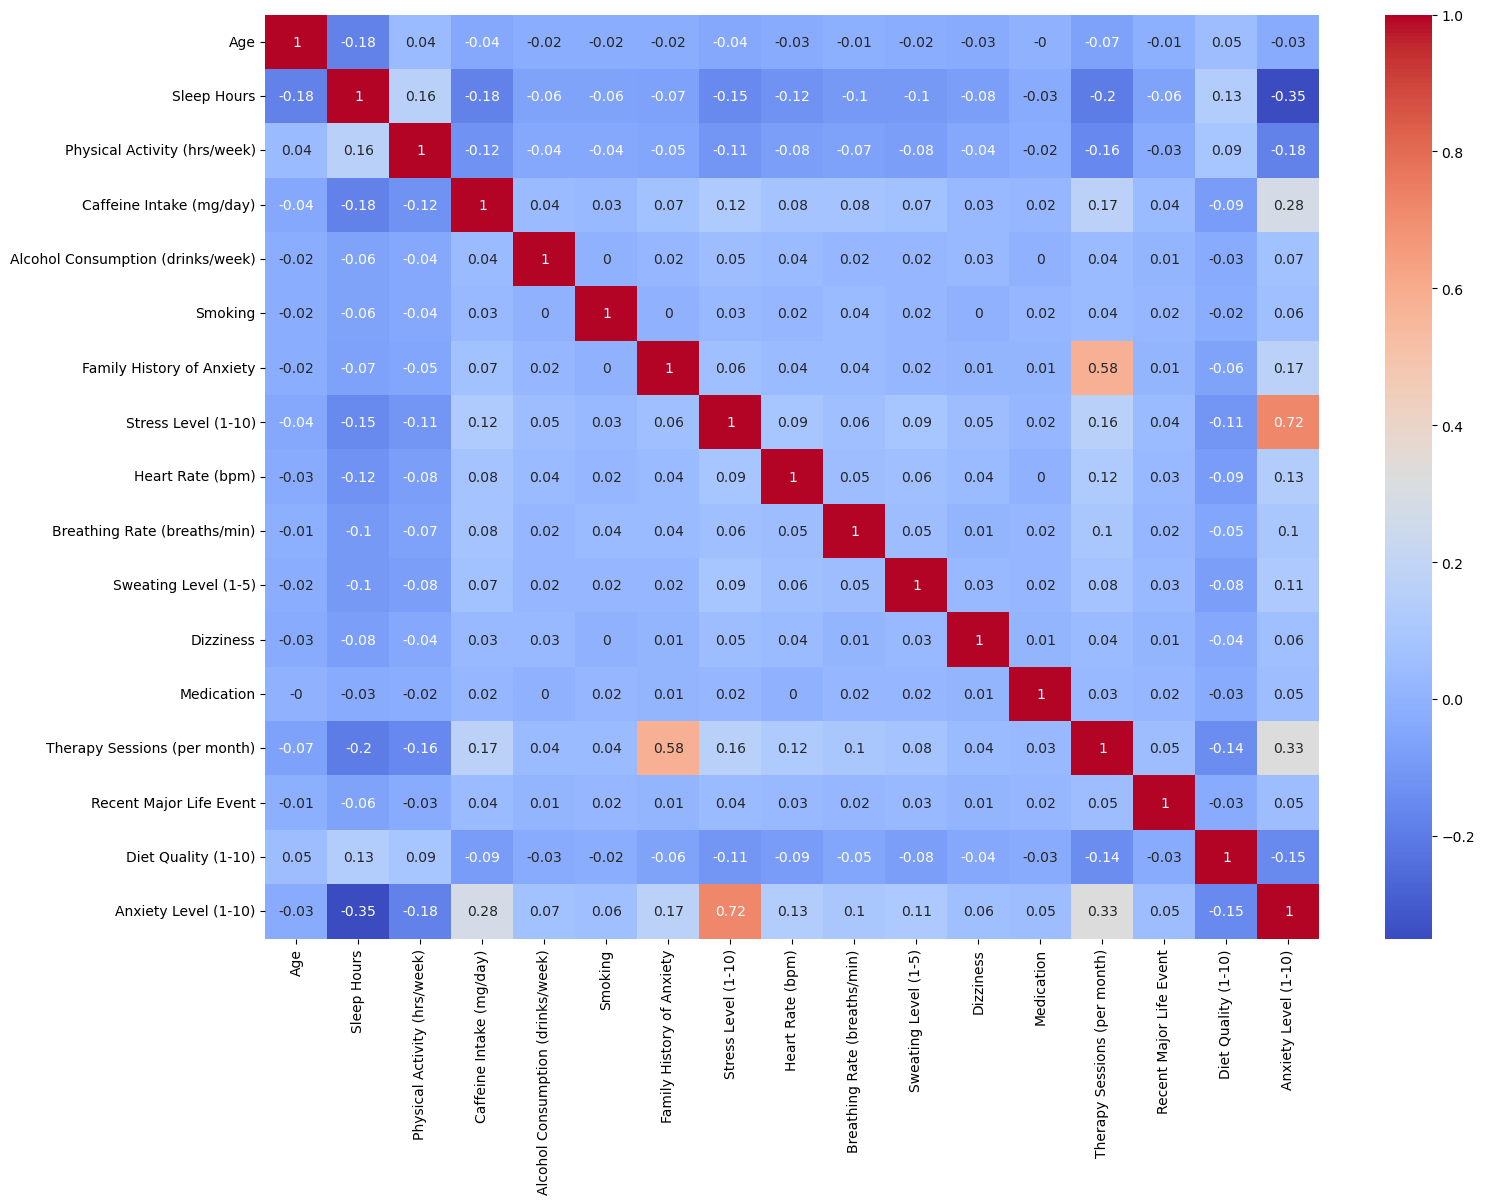

In [126]:
plt.figure(figsize=(17,12))
sns.heatmap(data=correlation_matrix,cmap='coolwarm', annot=True)
plt.show()

<div dir="rtl">
מפה התחלנו לעבוד על פיצול עמודת דופק ל3 רמות שונות ולנסות לראות אם הדופק משפיע על רמת החרדה
<ul dir="rtl">

In [333]:
bins = [60, 80, 100, 120, 160]
labels = ['60-80', '80-100', '100-120', '120-160']
df1['Heart Rate (bpm) Group'] = pd.cut(df1['Heart Rate (bpm)'], bins=bins, labels=labels, right=True)
df1['HR_Code'] = df1['Heart Rate (bpm) Group'].astype('category').cat.codes
group_counts = df1['Heart Rate (bpm) Group'].value_counts().sort_index()
group_counts

Heart Rate (bpm) Group
60-80      3354
80-100     3652
100-120    3837
120-160       0
Name: count, dtype: int64

In [335]:
df.groupby( 'Anxiety Level (1-10)')['Heart Rate (bpm)'].mean()

Anxiety Level (1-10)
1      89.358999
2      89.257403
3      89.838803
4      89.925911
5      88.868631
6      89.889610
7      87.471545
8     104.677686
9     104.410334
10    104.801242
Name: Heart Rate (bpm), dtype: float64

In [138]:
df[['Heart Rate (bpm)', 'Anxiety Level (1-10)']].corr()

,Heart Rate (bpm),Anxiety Level (1-10)
Heart Rate (bpm),1.0000,0.1889
Anxiety Level (1-10),0.1889,1.0000


C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\965461372.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HR_Group', y='Anxiety Level (1-10)', palette='coolwarm')


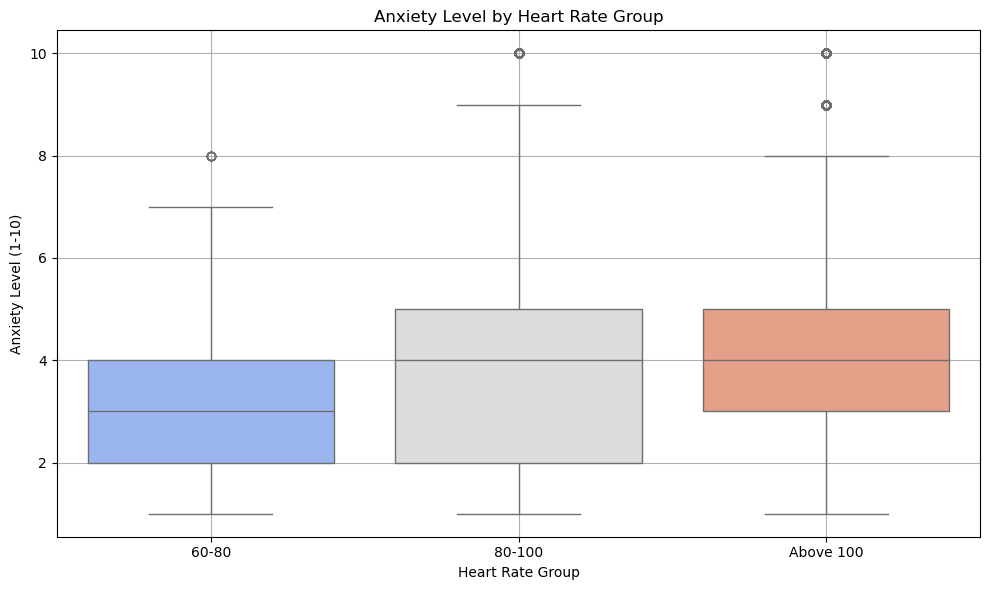

In [350]:
bins = [60, 80, 100, 200]
labels = ['60-80','80-100','Above 100']
df['HR_Group'] = pd.cut(df['Heart Rate (bpm)'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HR_Group', y='Anxiety Level (1-10)', palette='coolwarm')

plt.title('Anxiety Level by Heart Rate Group')
plt.xlabel('Heart Rate Group')
plt.ylabel('Anxiety Level (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\3260692506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anxiety Group', y='Heart Rate (bpm)', palette='coolwarm', order=order)


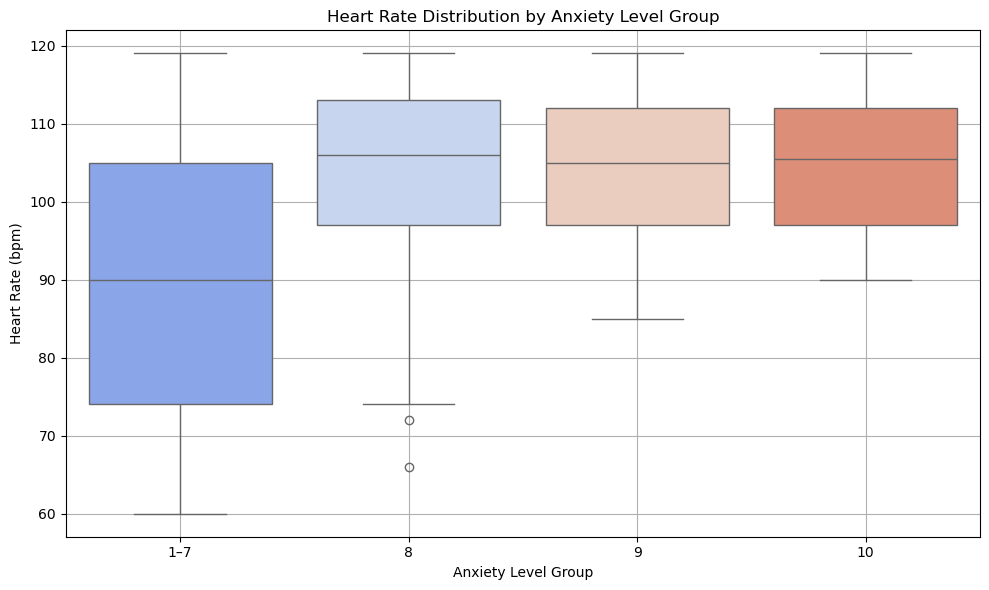

In [337]:
def group_anxiety(x):
    return '1–7' if x <= 7 else str(int(x))
df['Anxiety Group'] = df['Anxiety Level (1-10)'].apply(group_anxiety)
order = ['1–7', '8', '9', '10']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Anxiety Group', y='Heart Rate (bpm)', palette='coolwarm', order=order)
plt.title('Heart Rate Distribution by Anxiety Level Group')
plt.xlabel('Anxiety Level Group')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### תת מסקנה ראשונית:
<ul dir="rtl">
 אחרי מה שהצגנו עד כה ניתן לראות שהקשר בין דופק גבוה לחרדה גבוהה הוא קשר חד ערכי, והם משפיעים אחד על השני.
<ul>
</div>

<div dir="rtl">
עכשיו נתמקד בעמודת הנשימה
<ul dir="rtl">

In [48]:
df[['Breathing Rate (breaths/min)', 'Anxiety Level (1-10)']].corr()

,Breathing Rate (breaths/min),Anxiety Level (1-10)
Breathing Rate (breaths/min),1.000000,0.157048
Anxiety Level (1-10),0.157048,1.000000


In [50]:
def classify_breathing(rate):
    if 12 <= rate <= 20:
        return 'Normal'
    else:
        return 'Abnormal'
df['Breathing Rate Group'] = df['Breathing Rate (breaths/min)'].apply(classify_breathing)

df[['Breathing Rate (breaths/min)', 'Breathing Rate Group']].head()

,Breathing Rate (breaths/min),Breathing Rate Group
0,14,Normal
1,23,Abnormal
2,28,Abnormal
3,17,Normal
4,19,Normal


In [54]:
group_counts = df['Breathing_Group'].value_counts().sort_index()
group_counts

Breathing_Group
Below 12           571
12-20 (Normal)    4413
Above 20          6016
Name: count, dtype: int64

C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\1378013109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Breathing_Group', y='Anxiety Level (1-10)', palette='coolwarm')


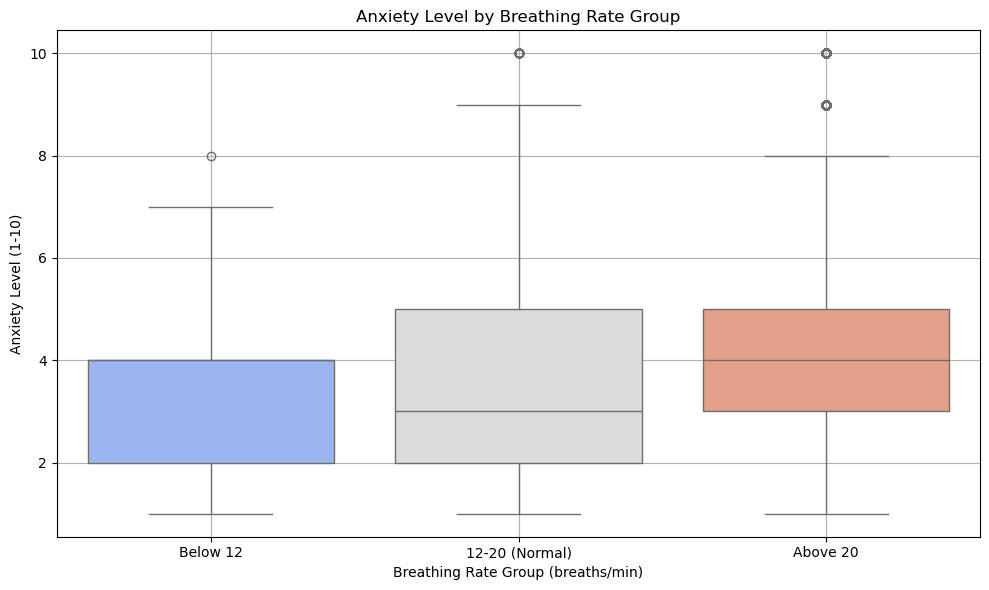

In [52]:
bins = [0, 12, 20, 60]
labels = ['Below 12', '12-20 (Normal)', 'Above 20']
df['Breathing_Group'] = pd.cut(df['Breathing Rate (breaths/min)'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Breathing_Group', y='Anxiety Level (1-10)', palette='coolwarm')

plt.title('Anxiety Level by Breathing Rate Group')
plt.xlabel('Breathing Rate Group (breaths/min)')
plt.ylabel('Anxiety Level (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ul
תת מסקנה שני:
ניתן לראות שיש גם קשר בין קצב נשימה גבוה לרמת חרדה.

<ul dir="rtl">
עכשיו ניסינו לראות אם יש קשר בין רמות הדופק השונות לרמות הנשימה השונות
<ul>

In [246]:
# plt.figure(figsize=(10, 4))
# scatter = plt.scatter(
#     df['Heart Rate (bpm)'],
#     df['Breathing Rate (breaths/min)'],
#     c=df['Anxiety Level (1-10)'],
#     cmap='coolwarm',
#     alpha=0.7
# )
# plt.colorbar(scatter, label='Anxiety Level (1-10)')
# plt.xlabel('Heart Rate (bpm)')
# plt.ylabel('Breathing Rate (breaths/min)')
# plt.title('Anxiety Level by Heart Rate and Breathing Rate')
# plt.grid(True)
# plt.show()

In [250]:
# group_means = df.groupby('Combined_Group')['Anxiety Level (1-10)'].mean().sort_values()

# # הפיכת Combined_Group לקטגוריה עם סדר לפי ממוצע חרדה
# df['Combined_Group'] = pd.Categorical(df['Combined_Group'], 
#                                        categories=group_means.index.tolist(), 
#                                        ordered=True)

# # ציור boxplot
# plt.figure(figsize=(14, 6))
# sns.boxplot(data=df, x='Combined_Group', y='Anxiety Level (1-10)', palette='coolwarm')

# plt.title('Anxiety Level by Combined Heart and Breathing Rate Groups (Ordered by Avg Anxiety)')
# plt.xlabel('Combined Group (Heart Rate | Breathing Rate)')
# plt.ylabel('Anxiety Level (1-10)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\3784391572.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('Combined_Group')['Anxiety Level (1-10)'].mean().sort_values()
C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\3784391572.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


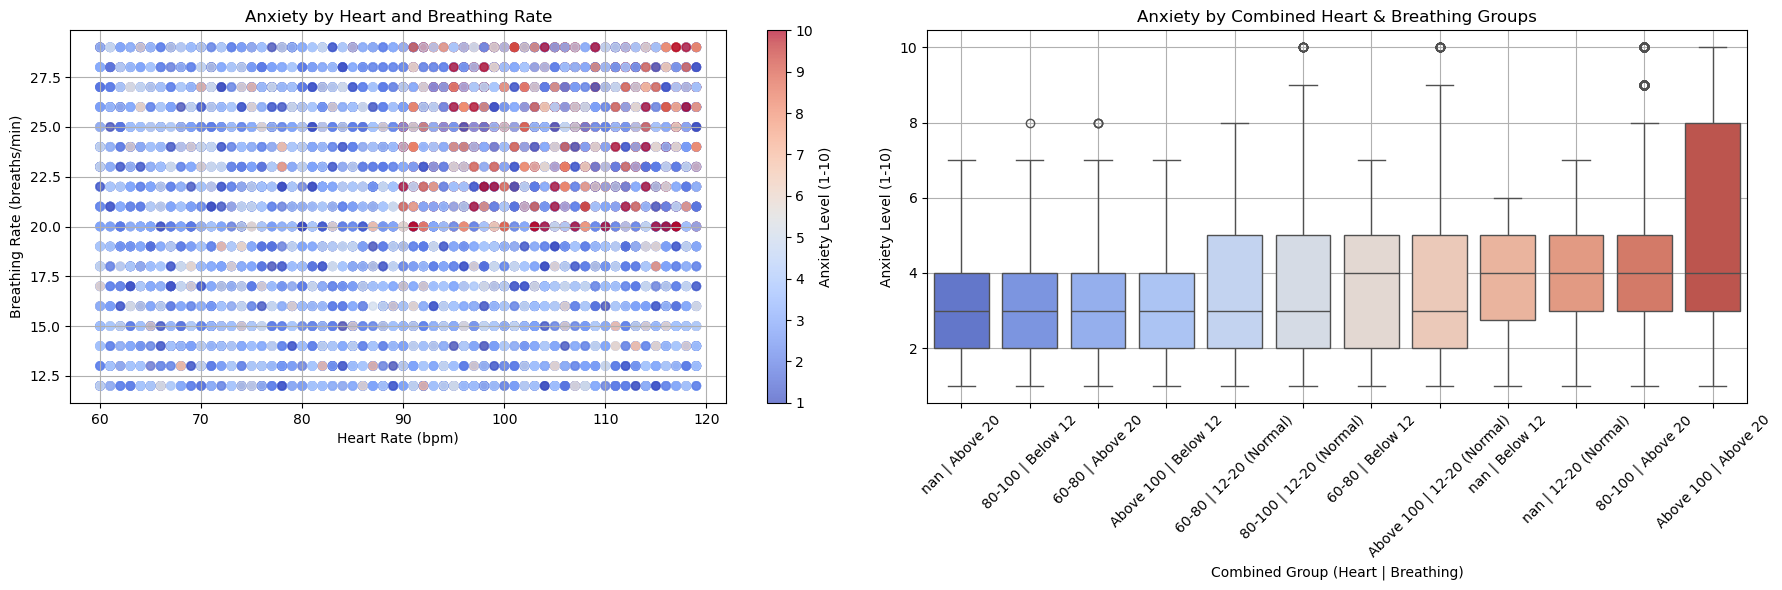

In [262]:
# מחשבים את ממוצעי הקבוצות לצורך סידור
group_means = df.groupby('Combined_Group')['Anxiety Level (1-10)'].mean().sort_values()
df['Combined_Group'] = pd.Categorical(
    df['Combined_Group'], 
    categories=group_means.index.tolist(), 
    ordered=True
)

# הגדרת שטח התרשים עם 2 גרפים זה לצד זה
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# גרף 1: scatter plot של דופק ונשימה עם צבע לפי רמת חרדה
scatter = axes[0].scatter(
    df['Heart Rate (bpm)'],
    df['Breathing Rate (breaths/min)'],
    c=df['Anxiety Level (1-10)'],
    cmap='coolwarm',
    alpha=0.7
)
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Breathing Rate (breaths/min)')
axes[0].set_title('Anxiety by Heart and Breathing Rate')
axes[0].grid(True)
cbar = fig.colorbar(scatter, ax=axes[0])
cbar.set_label('Anxiety Level (1-10)')

# גרף 2: boxplot לפי קבוצות משולבות
sns.boxplot(
    data=df,
    x='Combined_Group',
    y='Anxiety Level (1-10)',
    palette='coolwarm',
    ax=axes[1]
)
axes[1].set_title('Anxiety by Combined Heart & Breathing Groups')
axes[1].set_xlabel('Combined Group (Heart | Breathing)')
axes[1].set_ylabel('Anxiety Level (1-10)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

<div dir="rtl">

### **תת־מסקנה נוסף:**
<ul dir="rtl">
 <li>אם נאחד את הנתונים של הדופק והנשימה ביחס לחרדה נראה שכאשר יש דופק ונשימה מואצים,   <li>
החרדה גבוהה בהתאמה. אבל כאשר רק אחד מהם גבוה לא בהכרח יש חרדה ברמה גבוהה.
<ul>
</div>

<ul dir="rtl">
עכשיו נמתקד ברמות זיעות השונות
<ul>

In [65]:
group_count = df['Sweating Level (1-5)'].value_counts().sort_index()
group_count

Sweating Level (1-5)
1    1978
2    2092
3    2323
4    2279
5    2328
Name: count, dtype: int64

In [67]:
df[['Sweating Level (1-5)', 'Anxiety Level (1-10)']].corr()

,Sweating Level (1-5),Anxiety Level (1-10)
Sweating Level (1-5),1.000000,0.160074
Anxiety Level (1-10),0.160074,1.000000


C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\763630882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sweating Level (1-5)', y='Anxiety Level (1-10)', palette='coolwarm')


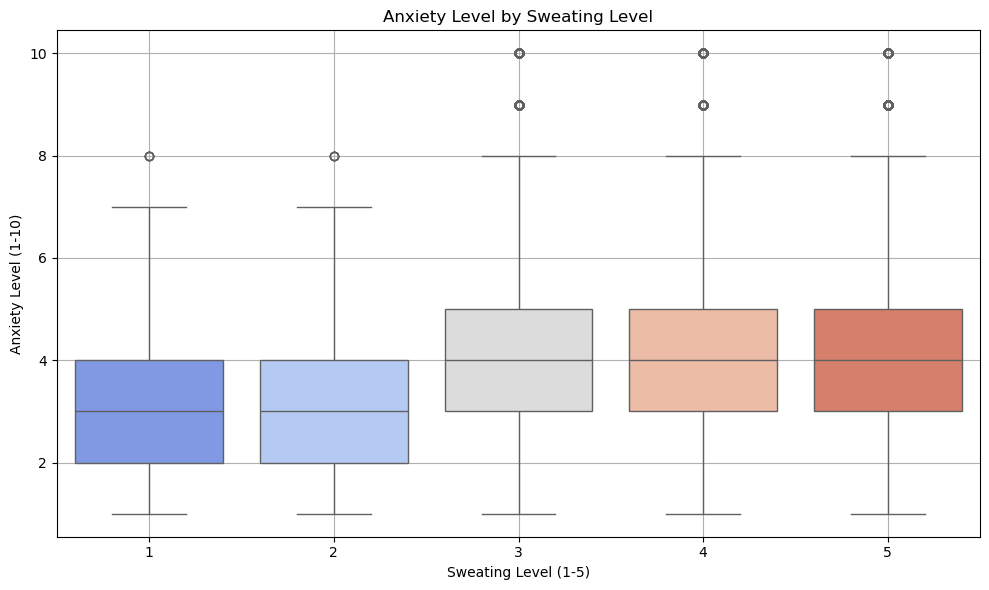

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sweating Level (1-5)', y='Anxiety Level (1-10)', palette='coolwarm')

plt.title('Anxiety Level by Sweating Level')
plt.xlabel('Sweating Level (1-5)')
plt.ylabel('Anxiety Level (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **תת־מסקנה נוספת:**
<ul dir="rtl">
אנו רואים שגם רמת הזיעה משפיעה על רמת החרדה
</div>

<div dir="rtl">
עכשיו נעבוד להראות שיש קשר בין כולם ונציג אותם בגרפים

<ul dir="rtl">

C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\869859404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Combined_3'] = (
C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\869859404.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Combined_3', y='Anxiety Level (1-10)', palette='coolwarm')


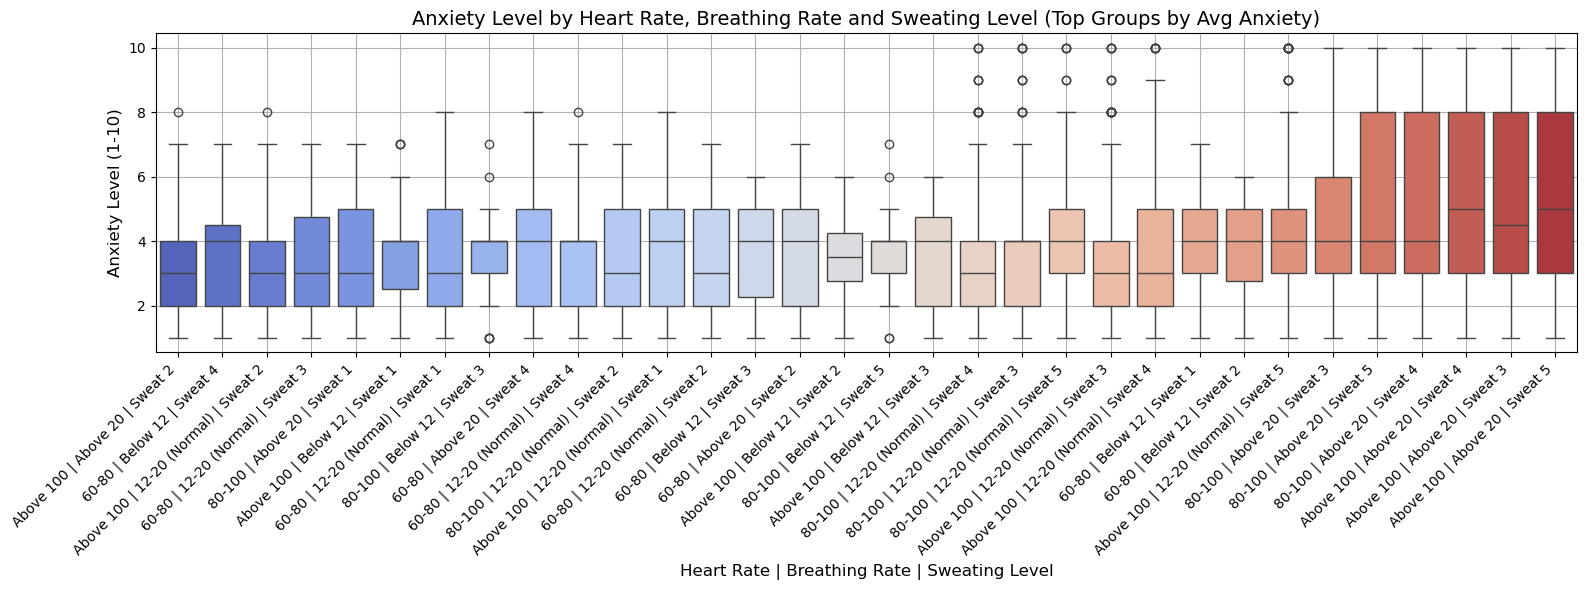

In [196]:
df_filtered = df.dropna(subset=['HR_Group', 'Breathing_Group', 'Sweating Level (1-5)'])

# יצירת עמודת קבוצה משולבת
df_filtered['Combined_3'] = (
    df_filtered['HR_Group'].astype(str) + ' | ' +
    df_filtered['Breathing_Group'].astype(str) + ' | Sweat ' +
    df_filtered['Sweating Level (1-5)'].astype(str)
)

# חישוב ממוצע חרדה לכל קבוצה
group_means = df_filtered.groupby('Combined_3')['Anxiety Level (1-10)'].mean().sort_values()

# הסרת 13 הקבוצות הראשונות
filtered_categories = group_means.index[13:]  # שמירת הקבוצות מה-14 והלאה

# הגדרת סדר וסינון לפלוט
df_filtered = df_filtered[df_filtered['Combined_3'].isin(filtered_categories)]
df_filtered['Combined_3'] = pd.Categorical(df_filtered['Combined_3'],
                                           categories=filtered_categories,
                                           ordered=True)

# ציור boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_filtered, x='Combined_3', y='Anxiety Level (1-10)', palette='coolwarm')


plt.title('Anxiety Level by Heart Rate, Breathing Rate and Sweating Level (Top Groups by Avg Anxiety)', fontsize=14)
plt.xlabel('Heart Rate | Breathing Rate | Sweating Level', fontsize=12)
plt.ylabel('Anxiety Level (1-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **מסקנה:**
 <li>רמת החרדה משפיעה בצורה חד־ערכית על המצב הבריאותי של האדם.</li>

<h3 dir="rtl">הרחבה:</h3>
<ul dir="rtl">
  <li>כאשר אדם סובל בו־זמנית מהזעת יתר, דופק גבוה ונשימות מהירות ניתן לקשר זאת באופן מובהק לרמות חרדה גבוהות.</li>
  <li>כאשר מופיע רק אחד מהסימפטומים (למשל דופק גבוה בלבד) לא ניתן לקבוע בוודאות שזה נובע מחרדה, מאחר והסימפטום עשוי לנבוע גם מסיבות אחרות (כמו פעילות גופנית, מחלה פיזית וכו').</li>
</ul>

</div>

C:\Users\maozg\AppData\Local\Temp\ipykernel_15996\1208961910.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Combined_3', y='Anxiety Level (1-10)', palette='coolwarm')


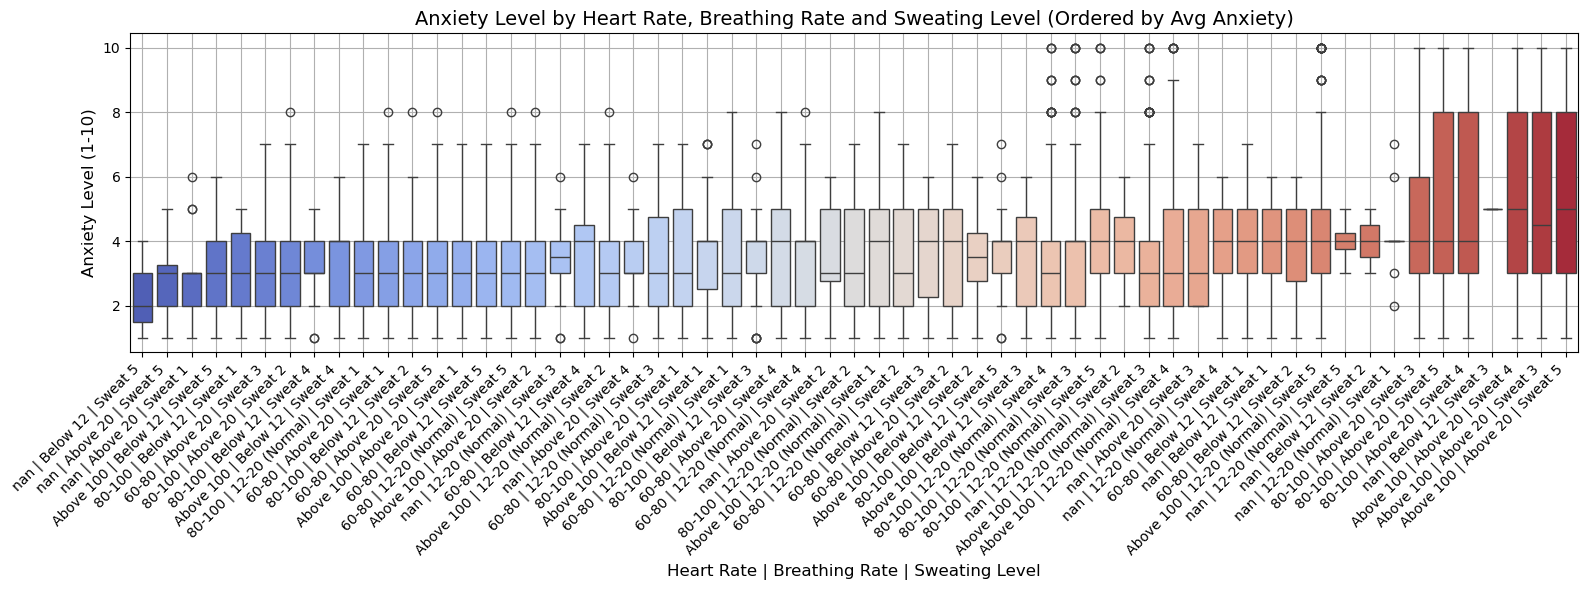

In [201]:
df['Combined_3'] = (
    df['HR_Group'].astype(str) + ' | ' +
    df['Breathing_Group'].astype(str) + ' | Sweat ' +
    df['Sweating Level (1-5)'].astype(str)
)

# חישוב ממוצע חרדה לכל קבוצה
group_means = df.groupby('Combined_3')['Anxiety Level (1-10)'].mean().sort_values()

# הגדרת הסדר לפי ממוצע חרדה
df['Combined_3'] = pd.Categorical(df['Combined_3'], 
                                  categories=group_means.index.tolist(), 
                                  ordered=True)

# ציור boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Combined_3', y='Anxiety Level (1-10)', palette='coolwarm')

plt.title('Anxiety Level by Heart Rate, Breathing Rate and Sweating Level (Ordered by Avg Anxiety)', fontsize=14)
plt.xlabel('Heart Rate | Breathing Rate | Sweating Level', fontsize=12)
plt.ylabel('Anxiety Level (1-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()